Lab 14.2 Implementation of Naive Bayes Algorithm
to classify emails as spam or ham

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("./EnglishSpam.csv", sep="\t", header=None)
df  =df.rename(columns = {0: 'label', 1:'message'})
display(df.head(10))

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [35]:
df['spam'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)
display(df.head(10))

,label,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [36]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(df.message, df.spam, test_size = 0.30)

In [37]:
## can also be used tfidf vectorizer instead of countvectorizer
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train)
x_test_count = cv.transform(x_test)

In [38]:
# Training the naive bayes 
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [39]:
# Make predictions
y_pred = model.predict(x_test_count)

# ACcuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.986244019138756



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1459
           1       0.96      0.93      0.95       213

    accuracy                           0.99      1672
   macro avg       0.97      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



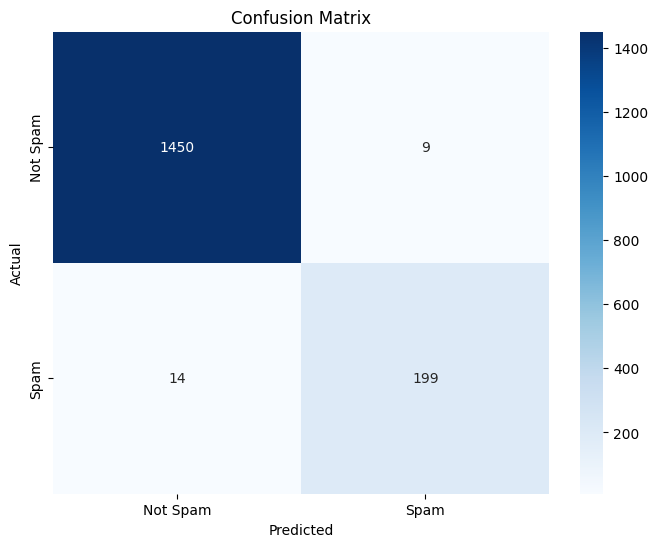

In [40]:
# Classification Report and Confussion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Test the model with a sample email
sample_email = ["Congratulations! You've won a free gift card. Click here to claim."]
sample_email_vec = cv.transform(sample_email)
print("\nSample Email Prediction (1=Spam, 0=Not Spam):", model.predict(sample_email_vec)[0])



Sample Email Prediction (1=Spam, 0=Not Spam): 1


In [44]:
sample_email = ["hey wanna meet up for the game?"]
sample_email_vec = cv.transform(sample_email)
print("\nSample Email Prediction (1=Spam, 0=Not Spam):", model.predict(sample_email_vec)[0])


Sample Email Prediction (1=Spam, 0=Not Spam): 0
